## Numpy

`numpy` is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

Why it is useful: Memory-efficient container that provides fast numerical operations.

Compare the following times:

In [2]:
L = range(1000)

%timeit [i**2 for i in L]

186 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
a = np.arange(1000)

%timeit a**2

1.01 µs ± 3.09 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

Create a rank 1 array:

In [4]:
a = np.array([1, 2, 3])
print(type(a), a.shape, a[0], a[1], a[2])         

<class 'numpy.ndarray'> (3,) 1 2 3


Change an element of the array:

In [5]:
a[0] = 5
print(a)         

[5 2 3]


Create a rank 2 array:

In [6]:
b = np.array([[1,2,3],[4,5,6]])
print(b)

[[1 2 3]
 [4 5 6]]


Indexing:

In [7]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


In [8]:
print(b[0][0], b[0][1], b[1][0])

1 2 4


In [9]:
l = [[1, 2, 3], [2, 3, 4]]

In [10]:
print(l[0][0])

1


In [11]:
print(l[0,0])

TypeError: list indices must be integers or slices, not tuple

Numpy also provides many functions to create arrays:

Create an array of all zeros:

In [14]:
a = np.zeros(shape=(2,2))
print(a)

[[0. 0.]
 [0. 0.]]


Create an array of all ones:

In [15]:
b = np.ones((1,2))
print(b)

[[1. 1.]]


Create a constant array:

In [16]:
c = np.full((2,2), 7)
print(c)

[[7 7]
 [7 7]]


Create a 2x2 identity matrix:

In [18]:
d = np.eye(5)
print(d)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Create an array filled with random values:

In [21]:
e = np.random.random((5,2))
print(e)

[[0.63176897 0.01508983]
 [0.02109948 0.11639114]
 [0.85403405 0.21634523]
 [0.99558991 0.25724565]
 [0.81073374 0.29160342]]


Compare the following expressions:

In [22]:
import math

l = range(10)
print(math.sin(l))

TypeError: must be real number, not range

In [23]:
import numpy as np

l = np.arange(10)
print(np.sin(l))

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


Another important function:

`np.linspace(start, stop, n_elements)`

In [16]:
l = np.linspace(0, 10, 5)

print(l)

[ 0.   2.5  5.   7.5 10. ]


Compare it to `np.arange`:

`np.arange(start, stop, step)`

In [20]:
l = np.arange(0, 12.5, 2.5)

print(l)

[ 0.   2.5  5.   7.5 10. ]


### Stacking

You can build bigger arrays out of smaller arrays by stacking along different dimensions using the functions `np.hstack` and `np.vstack`.

Stack 3 different 1D NumPy arrays of length 3 vertically forming a 3 by 3 matrix:

In [24]:
x = np.array([1,1,1])
y = np.array([2,2,2])
z = np.array([3,3,3])

vstacked = np.vstack((x,y,z))

print(vstacked)

[[1 1 1]
 [2 2 2]
 [3 3 3]]


Stack 1D NumPy arrays horizontally to create another 1D array:

In [25]:
hstacked = np.hstack((x,y,z))

print(hstacked)

[1 1 1 2 2 2 3 3 3]


In [28]:
np.concatenate((x,y,z), axis=0)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [30]:
np.concatenate((x,y,z), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

Create the following rank 2 array with shape (3, 4):

In [31]:
import numpy as np

a = np.array([[1,  2,  3,  4], 
              [5,  6,  7,  8], 
              [9, 10, 11, 12]])

Use slicing to pull out the subarray consisting of the first 2 rows and columns 1 and 2; b is the following array of shape (2, 2):

In [32]:
b = a[:2, 1:3]

print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [52]:
print(a[0, 1])
b[0, 0] = 77
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array.

In [33]:
a = np.array([[1,  2,  3,  4], 
              [5,  6,  7,  8], 
              [9, 10, 11, 12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

Rank 1 view of the second row of `a`:

In [34]:
row_r1 = a[1, :]
print(row_r1, row_r1.shape)

[5 6 7 8] (4,)


Rank 2 view of the second row of `a`:

In [35]:
row_r2 = a[1:2, :]
print(row_r2, row_r2.shape)

[[5 6 7 8]] (1, 4)


Rank 2 view of the second row of `a`:

In [36]:
row_r3 = a[[1,2], :]
print(row_r3, row_r3.shape)

[[ 5  6  7  8]
 [ 9 10 11 12]] (2, 4)


We can make the same distinction when accessing columns of an array:

In [37]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [20]:
a = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])

An example of integer array indexing.
The returned array will have shape (3,):

In [21]:
print(a[[0, 1, 2], [0, 1, 0]])

[1 4 5]


The above example of integer array indexing is equivalent to this:

In [22]:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]


When using integer array indexing, you can reuse the same element from the source array:

In [23]:
print(a[[0, 0], [1, 1]])

[2 2]


Equivalent to the previous integer array indexing example:

In [24]:
print(np.array([a[0, 1], a[0, 1]]))

[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

Create a new array from which we will select elements:

In [38]:
a = np.array([[1,  2,  3], 
              [4,  5,  6], 
              [7,  8,  9], 
              [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


Create an array of indices:

In [39]:
b = np.array([0, 2, 0, 1])

Select one element from each row of a using the indices in b:

In [40]:
print(a[np.arange(4), b])

[ 1  6  7 11]


Mutate one element from each row of a using the indices in b:

In [41]:
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

Find the elements of a that are bigger than 2. This returns a numpy array of Booleans of the same shape as a, where each slot of bool_idx tells whether that element of a is > 2:

In [30]:
a = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])

bool_idx = (a > 2)  

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


We use boolean array indexing to construct a rank 1 array consisting of the elements of a corresponding to the True values of `bool_idx`:

In [31]:
print(a[bool_idx])

[3 4 5 6]


We can do all of the above in a single concise statement:

In [32]:
print(a[a > 2])

[3 4 5 6]


You should check also a useful function `np.where`.

### Array masks

Using boolean masks:

In [42]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)

print(a)

[10  3  8  0 19 10 11  9 10  6  0 20 12  7 14]


Generate indexes for masking:

In [44]:
mask = (a % 3 == 0)

print(mask)

[False  True False  True False False False  True False  True  True False
  True False False]


Extract a sub-array with the mask:

In [45]:
extract_from_a = a[mask]

print(extract_from_a)

[ 3  0  9  6  0 12]


In [46]:
mask = (a % 3 != 0)

print(a[mask])

[10  8 19 10 11 10 20  7 14]


Indexing with a mask can be very useful to assign a new value to a sub-array:

In [38]:
a[a % 3 == 0] = -1

print(a)

[10 -1  8 -1 19 10 11 -1 10 -1 -1 20 -1  7 14]


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

Let `numpy` choose the datatype:

In [49]:
x = np.array([1, 2])
x.dtype

dtype('int64')

Let `numpy` choose the datatype:

In [50]:
y = np.array([1.0, 2.0])
y.dtype

dtype('float64')

Force a particular datatype:

In [51]:
z = np.array([1, 2], dtype=np.float64)

Let's check the datatypes:

In [52]:
print(x.dtype, y.dtype, z.dtype)

int64 float64 float64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [53]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

Elementwise sum; both produce the array:

In [54]:
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


Elementwise difference; both produce the array:

In [55]:
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


Elementwise product; both produce the array:

In [56]:
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


Elementwise division; both produce the array:

In [57]:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


Elementwise square root; produces the array:

In [58]:
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


We use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [59]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

Inner product of vectors; both produce 219:

In [60]:
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [51]:
print(v @ w)

219


Matrix / vector product; both produce the rank 1 array [29 67]:

In [61]:
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


Matrix / matrix product; both produce the rank 2 array:

In [54]:
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [62]:
x = np.array([[1,2],
              [3,4]])

Compute sum of all elements; prints "10":

In [63]:
print(np.sum(x))

10


Compute sum of each column; prints "[4 6]":

In [57]:
print(np.sum(x, axis=0))

[4 6]


Compute sum of each row; prints "[3 7]":

In [58]:
print(np.sum(x, axis=1))

[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [64]:
print(x)
print('Transposed x:\n', x.T)
print('Transposed x:\n', np.transpose(x))

[[1 2]
 [3 4]]
Transposed x:
 [[1 3]
 [2 4]]
Transposed x:
 [[1 3]
 [2 4]]


In [63]:
v = np.array([[1,2,3]])
print(v)
print('Transposed v:\n', v.T)

[[1 2 3]]
Transposed v:
 [[1]
 [2]
 [3]]


In [69]:
v = np.array([1, 2, 3, 4, 5])

print(v[np.newaxis])

[[1 2 3 4 5]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

We will add the vector `v` to each row of the matrix `x`, storing the result in the matrix `y`:

In [71]:
x = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,9], 
              [10,11,12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)

print(y is x)

False


Add the vector `v` to each row of the matrix `x` with an explicit loop:

In [72]:
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

Stack 4 copies of `v` on top of each other:

In [75]:
vv = np.tile(v, (4, 1))
print(vv)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


Add `x` and `vv` elementwise:

In [76]:
y = x + vv
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting:

Add `v` to each row of `x` using broadcasting:

In [77]:
x = np.array([[1,2,3],
              [4,5,6], 
              [7,8,9], 
              [10,11,12]])
v = np.array([1, 0, 1])
y = x + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

Compute outer product of vectors:

In [90]:
a = np.array([[1, 2, 3],
              [2, 3, 4],
              [3, 4, 5],
              [4, 5, 6]])

In [91]:
a.shape

(4, 3)

In [89]:
c = a.reshape(3, -1)
print(c)
print(a)

[[1 2 3 2]
 [3 4 3 4]
 [5 4 5 6]]
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]


In [95]:
a.view?

In [72]:
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)

print(v)
print(w)

[1 2 3]
[4 5]


To compute an outer product, we first reshape `v` to be a column vector of shape (3, 1); we can then broadcast it against `w` to yield an output of shape (3, 2), which is the outer product of `v` and `w`:

In [73]:
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

### Copies and views

A slicing operation creates a view on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory. You can use np.may_share_memory() to check if two arrays share the same memory block. Note however, that this uses heuristics and may give you false positives.

When modifying the view, the original array is modified as well:

In [96]:
a = np.arange(10)
print(a)
b = a[::2]
print(b)

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]


In [97]:
np.may_share_memory(a, b)

True

In [98]:
b[0] = 12

print(b)
print(a)

[12  2  4  6  8]
[12  1  2  3  4  5  6  7  8  9]


With a forced copy:

In [99]:
a = np.arange(10)

c = a[::2].copy()
c[0] = 12

print(a)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[12  2  4  6  8]


In [100]:
np.may_share_memory(a, c)

False

### Adding a dimension

Indexing with the np.newaxis object allows us to add an axis to an array (you have seen this already above in the broadcasting section):

In [101]:
z = np.array([1, 2, 3])
print(z)
print(z.shape)

[1 2 3]
(3,)


Add an axis as a column:

Note: this will be very useful in `scikit-learn`.

In [102]:
zax = z[:, np.newaxis]
print(zax)
print(zax.shape)

[[1]
 [2]
 [3]]
(3, 1)


Add an axis as a row:

In [104]:
axz = z[np.newaxis, :]
print(axz)
print(axz.shape)

[[1 2 3]]
(1, 3)


### `maskedarray`: dealing with missing data (NaN)

Arbitrairy provided mask:

In [89]:
x = np.ma.array([1, 2, 3, 4], mask=[0, 1, 0, 1])
print(x)

[1 -- 3 --]


In [90]:
y = np.ma.array([1, 2, 3, 4], mask=[0, 1, 1, 1])
print(x + y)

[2 -- -- --]


There are masking versions of common functions:

In [105]:
np.sqrt([-1, -2, -3])

/home/jr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([nan, nan, nan])

In [106]:
np.ma.sqrt([1, -1, 2, -2]) 

masked_array(data=[1.0, --, 1.4142135623730951, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20)

Where we can see that square root of negative values is masked.

In [107]:
np.array([[1,2,3],[4,5,6]], [2,3,4])

TypeError: data type not understood

### Polynomials

`numpy` also contains polynomials in different bases. For example consider, $3x^2 + 2x - 1$:

In [98]:
p = np.poly1d([3, 2, -1])

print('Parameters: {} {} {}'.format(p[0], p[1], p[2]))
print('Order: {}'.format(p.order))
print('Calculate roots: {} {}'.format(p.roots[0], p.roots[1]))
print('Check if roots are calculated properly: p(-1) = {}, p(0.33) = {}'.format(p(p.roots[0]), p(p.roots[1])))

Parameters: -1 2 3
Order: 2
Calculate roots: -1.0 0.3333333333333333
Check if roots are calculated properly: p(-1) = 0.0, p(0.33) = 0.0


Fit a polynomial to data (`x`, `y`):

In [3]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3 * np.random.rand(20)

p = np.poly1d(np.polyfit(x, y, deg=3))

Evaluate the polynomial on a new grid:

Text(0.5, 1.0, 'Fitting polynomial to data')

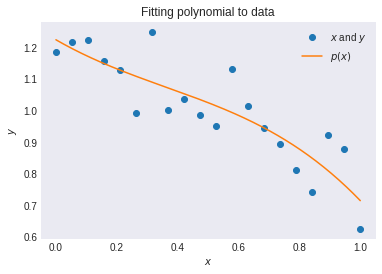

In [4]:
import numpy as np

t = np.linspace(0, 1, 200)

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-dark')
plt.figure(figsize=(6,4))
plt.plot(x, y, 'o', label='$x$ and $y$')
plt.plot(t, p(t), '-', label='$p(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Fitting polynomial to data')

Don't worry if you have problems with using `matplotlib`. We will introduce it shortly.

### Example

Write a function called `exp_int` which takes input parameters and and returns the (left) Riemann sum:

$\int_0^b e^{-x^2} dx \approx \sum_{k=0}^{N-1} e^{-x_k^2} \Delta x$ for $\Delta x=b/N$ and $x_k=k\Delta x$:

In [117]:
def exp_int(b, N):
    "Compute left Riemann sum of exp(-x^2) from 0 to b with N subintervals."
    x = np.linspace(0, b, N+1)
    x_left_endpoints = x[:-1]
    Delta_x = b / N
    I = Delta_x * np.sum(np.exp(-x_left_endpoints**2))
    return I

Now compare it to its true value:

In [118]:
approx = exp_int(b=100, N=100000)
true = np.sqrt(np.pi) / 2.0

print('The difference between the true value and the approximated value is {:.5f}'.format(abs(approx - true)))

The difference between the true value and the approximated value is 0.00050
